### <span style="color:red">**IMPORTANT: Execute the cell below before proceeding:**</span> 

In [1]:
%config InlineBackend.figure_format = 'retina'

from resources309 import *
get_resources("color_mixing.py", "baloon.jpg")

from os.path import join
import matplotlib.pyplot as plt
from py309.color_mixing import *
from sympy import *

init_printing(use_latex='mathjax')

Resource check finished.


# Color mixing

## RGB colors

The RGB color model is a method of describing colors. In this model each color is represented as a mixture of three basic colors: red, green, and blue. By varying intensities of these components a variety of colors can be obtained. 

In many computer applications intensities of the red, green, and blue are given by integers 
in the range 0-255, where 0 is the lowest intensity and 255 is the highest. The function `color_sample()` shows the color corresponding to given RGB coordinates:

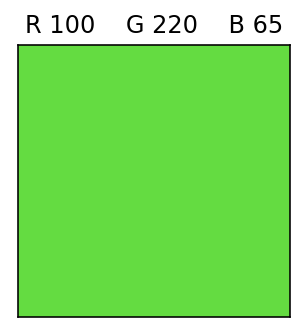

In [3]:
color_sample(100,220, 65)

Here we import an image file we will be working with:

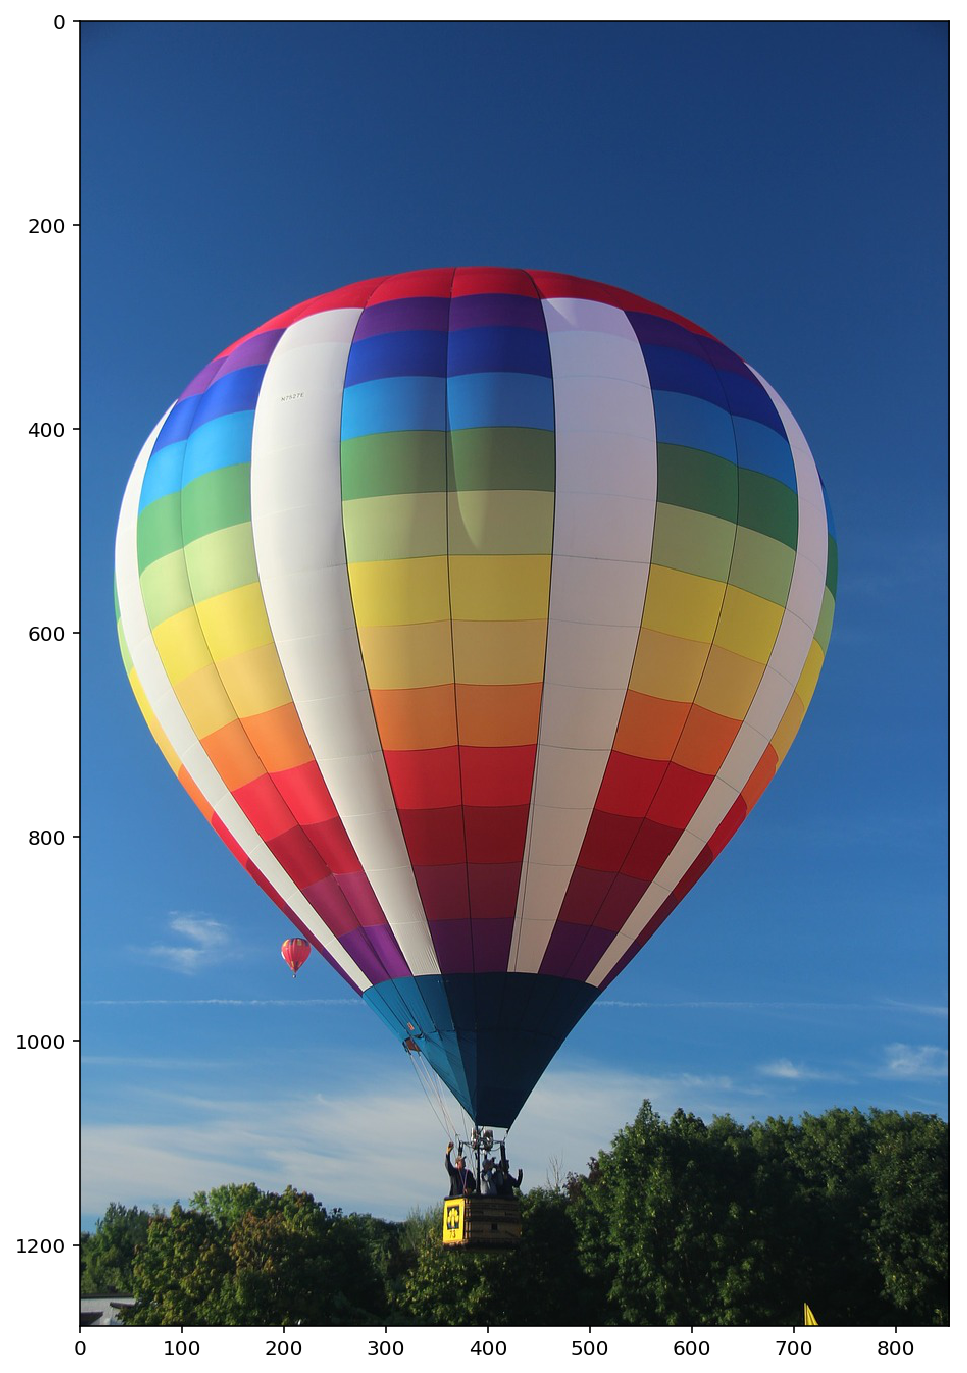

In [2]:
# import image
baloon = plt.imread(join("py309", "baloon.jpg"))

# set image size
plt.figure(figsize=(8,12))

#display image
plt.imshow(baloon)
plt.show()

The image is imported as an array of vectors, one vector for each image pixel. Each vector has 3 entries with RGB  coordinates of the pixel color:

In [3]:
baloon

array([[[ 30,  62, 109],
        [ 30,  62, 109],
        [ 30,  62, 111],
        ...,
        [ 17,  48,  94],
        [ 17,  48,  94],
        [ 17,  48,  94]],

       [[ 30,  62, 109],
        [ 31,  63, 110],
        [ 31,  63, 112],
        ...,
        [ 19,  47,  94],
        [ 18,  46,  93],
        [ 18,  46,  93]],

       [[ 31,  63, 112],
        [ 31,  63, 112],
        [ 31,  63, 112],
        ...,
        [ 21,  48,  95],
        [ 21,  48,  95],
        [ 20,  47,  94]],

       ...,

       [[ 19,  22,  31],
        [ 19,  22,  31],
        [ 19,  22,  31],
        ...,
        [ 21,  26,  19],
        [ 42,  47,  40],
        [ 43,  49,  39]],

       [[ 18,  23,  29],
        [ 18,  23,  29],
        [ 18,  23,  29],
        ...,
        [ 13,  18,  12],
        [ 24,  29,  22],
        [ 27,  33,  23]],

       [[ 17,  22,  26],
        [ 18,  23,  27],
        [ 18,  23,  27],
        ...,
        [ 15,  20,  14],
        [ 20,  25,  18],
        [ 23,  29,  19]]

## Color mixer

The `color_mixer()` function works as follows. It takes as its arguments a 3x3 matrix $A$ and an array representing an image. For each image pixel it takes the vector 

$$\mathbf{v} = \begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}$$

with RGB coordinates of the pixel, and replaces it with the vector $A\mathbf{v}$, which changes the pixel color. Then it displays the image with colors modified in this way:

In [13]:
A = Matrix([[0.3 , 1.2, 0.1], [1, 0.5, 0.1], [0.1, 0.3, 1]])
A

⎡0.3  1.2  0.1⎤
⎢             ⎥
⎢ 1   0.5  0.1⎥
⎢             ⎥
⎣0.1  0.3   1 ⎦

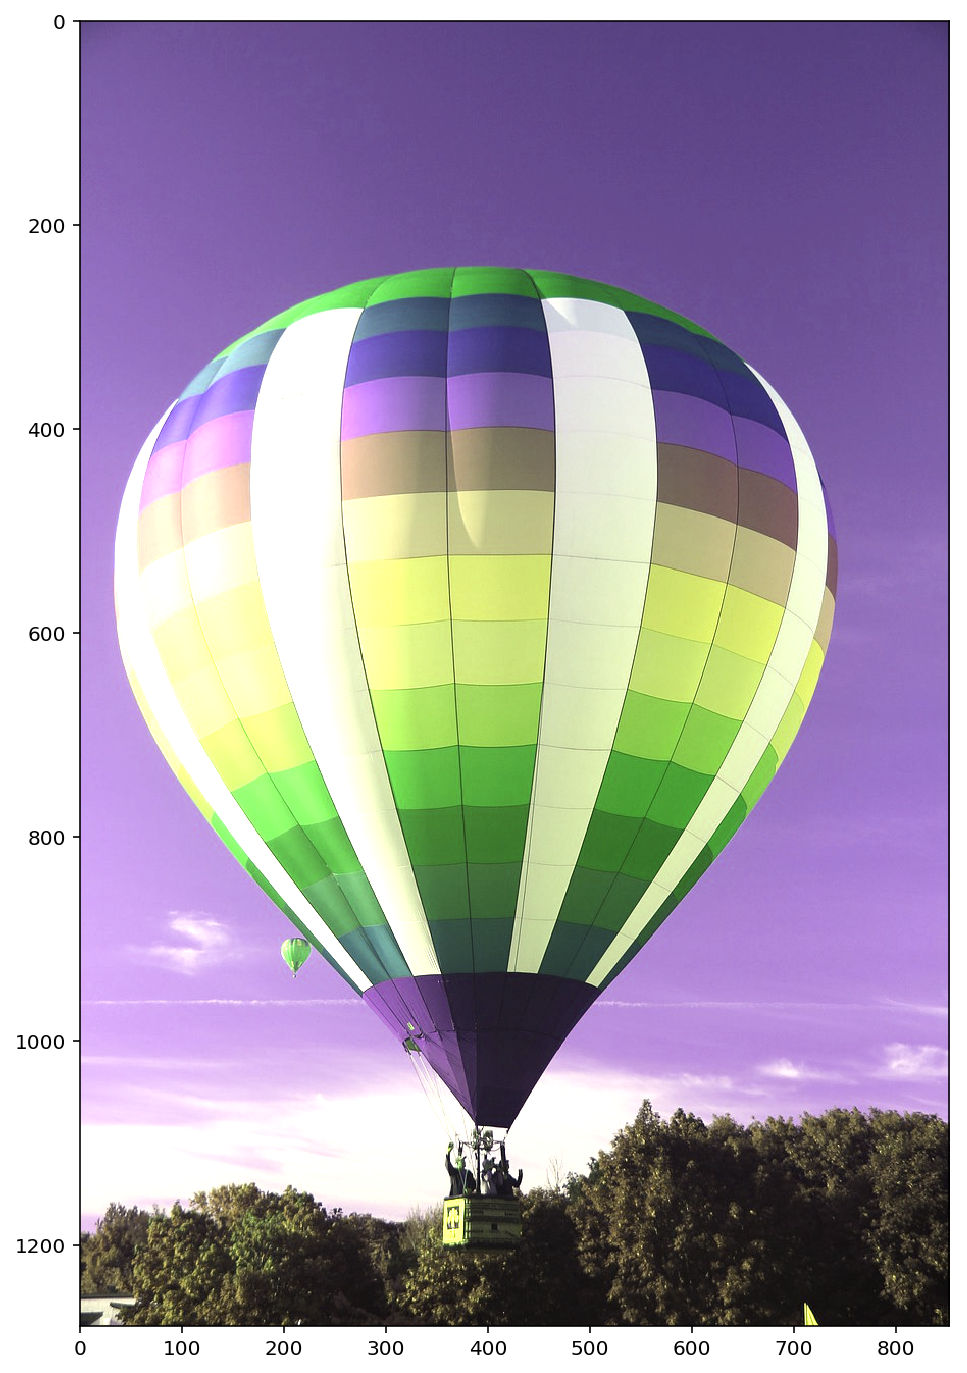

In [14]:
color_mixer(A, baloon)

**Note.** Since valid RGB values are integers between 0 and 255, coordinates of each vector $A\mathbf{v}$
are rounded to the nearest integer in this range. In particular, if $A\mathbf{v}$ has negative coordinates they the are rounded up to 0, and if it has coordinates exceeding 255 they are rounded down to 255. 

## Exercises

In each of the cases below find a $3\times 3$ matrix $A$ which transforms colors of image pixels as indicated. Use the function `color_mixer()` to display the resulting image.

**1. (5 pts)** The matrix leaves the red component unchanged and sets the other components to 0:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} r \\ 0 \\ 0 \\ \end{bmatrix} $$

<span style="color:red">**Solution:**</span>

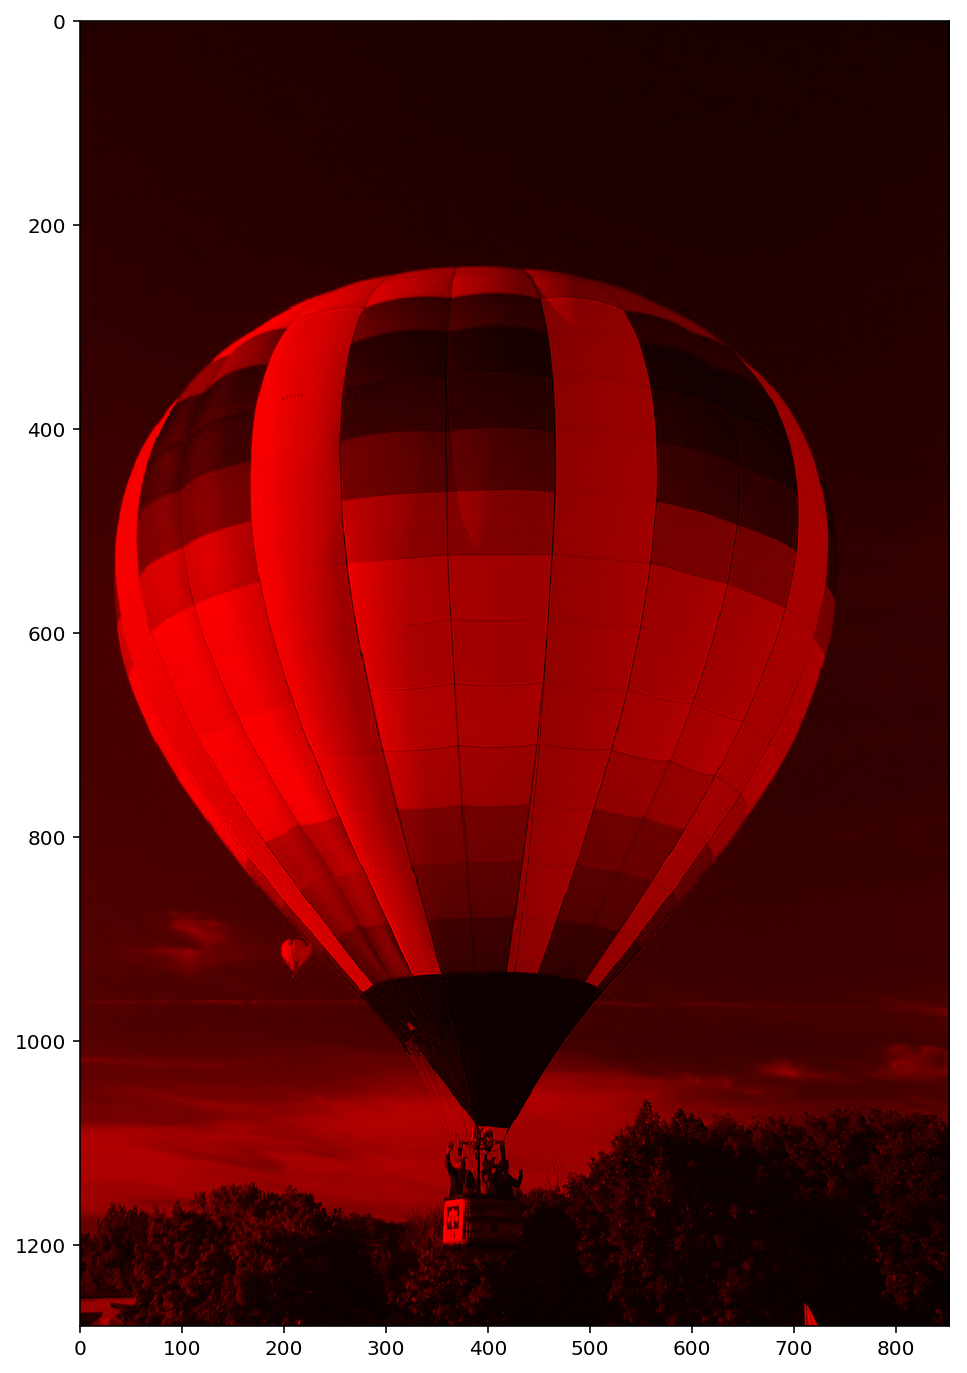

In [5]:
A = Matrix([[1, 0, 0], [0, 0, 0], [0, 0, 0]])
color_mixer(A, baloon)

**2. (5 pts)** The matrix interchanges the red component with the blue component:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} b \\ g \\ r \\ \end{bmatrix} $$

<span style="color:red">**Solution:**</span>

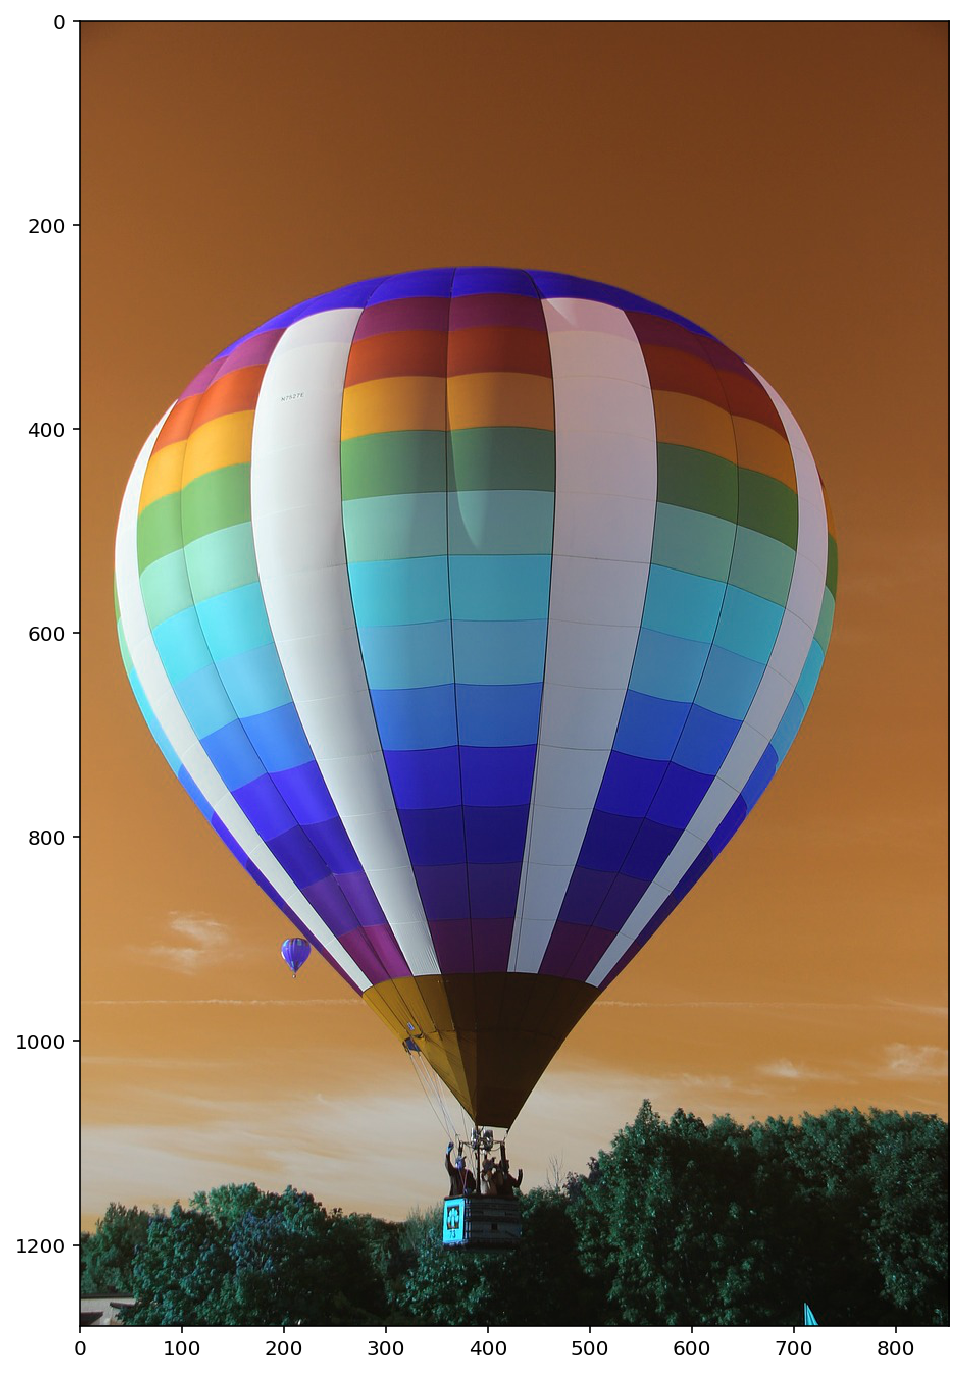

In [6]:
A = Matrix([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
color_mixer(A, baloon)

**3. (5 pts)** The matrix divides all components by 2:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} \frac{1}{2}r \\ \frac{1}{2}g \\ \frac{1}{2}b \\ \end{bmatrix} $$

<span style="color:red">**Solution:**</span>

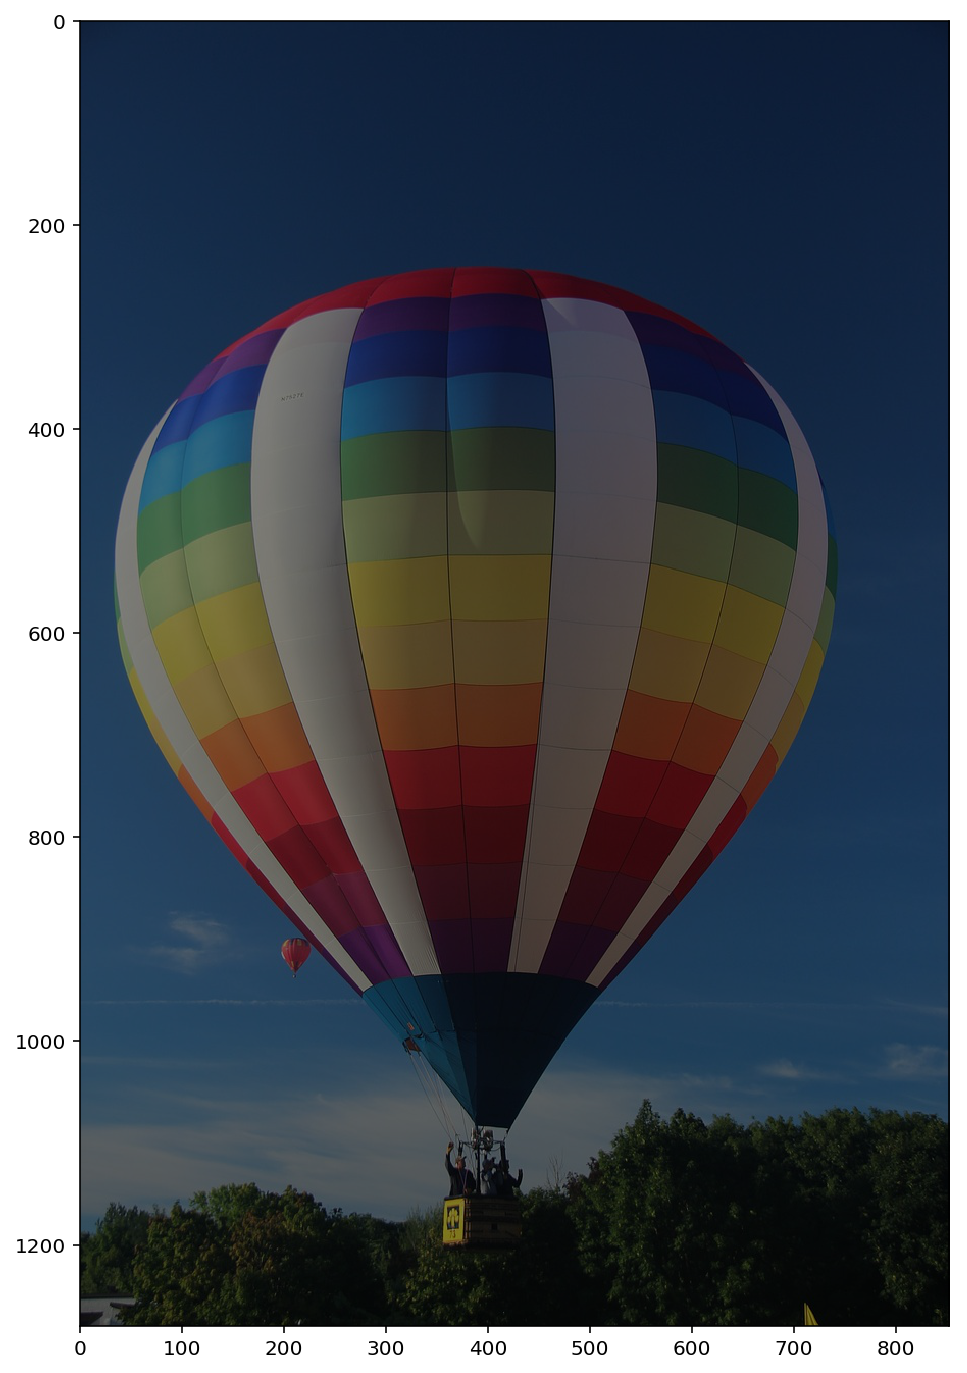

In [7]:
A = Matrix([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5]])
color_mixer(A, baloon)

**Solution:**

**4. (5 pts)** The matrix replaces all components by their average:

$$A\begin{bmatrix} r \\ g \\ b \\ \end{bmatrix}  = \begin{bmatrix} \dfrac{r+g+b}{3} \\[1mm] \dfrac{r+g+b}{3} \\[1mm] \dfrac{r+g+b}{3} \\ \end{bmatrix} $$

<span style="color:red">**Solution:**</span>

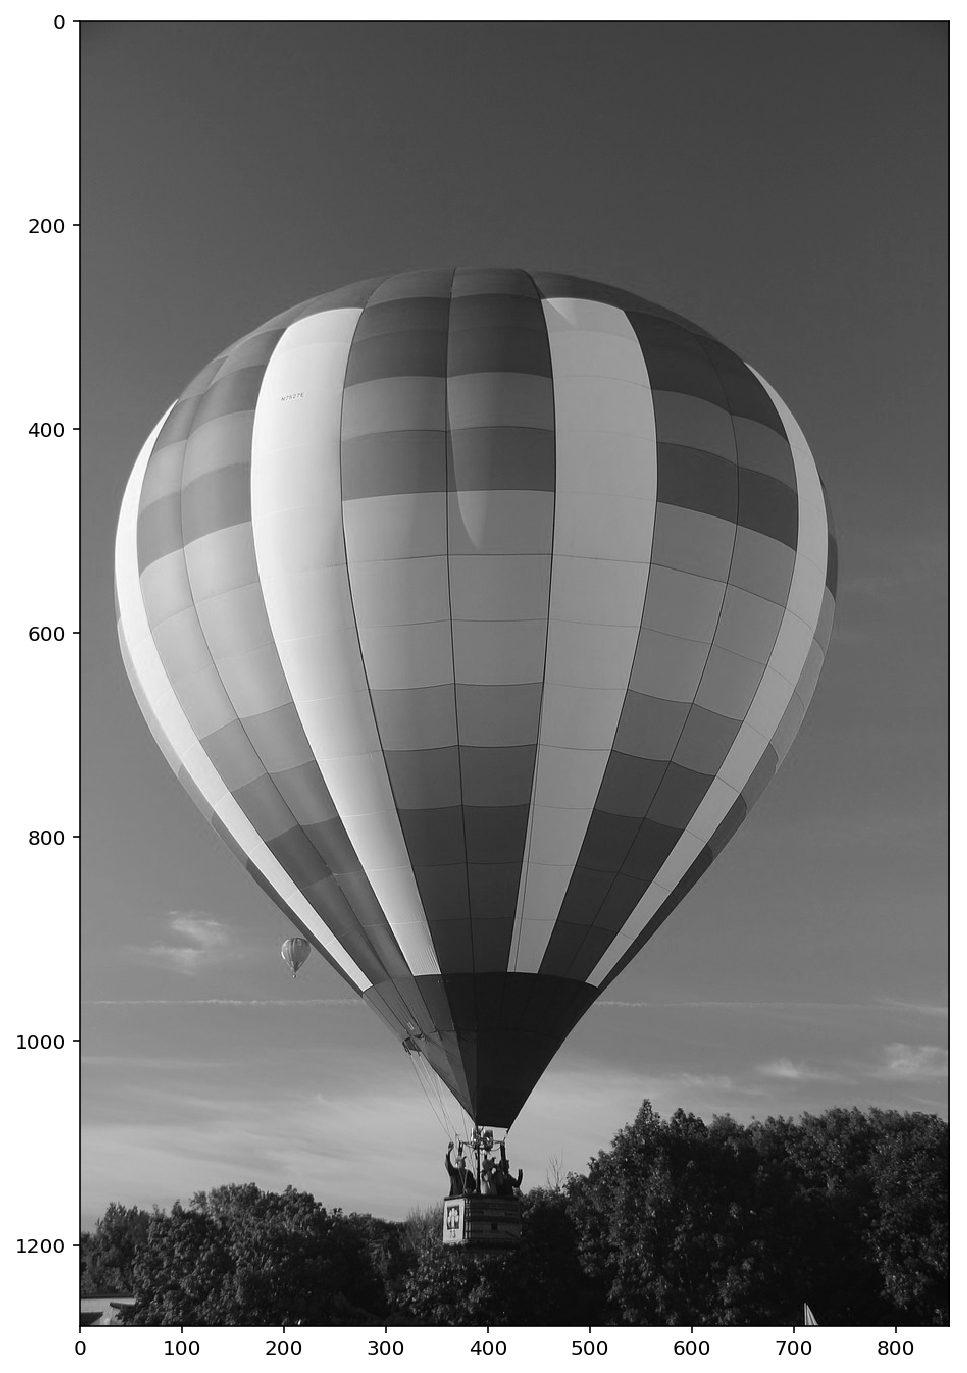

In [8]:
A = Matrix([[1/3, 1/3, 1/3], [1/3, 1/3, 1/3], [1/3, 1/3, 1/3]])
color_mixer(A, baloon)